In [1]:
#importing libraries
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from pathlib import Path
from fastai.vision.all import *

In [2]:
#Setting the path of the dataset
x  = 'E:\AI Mini Porject\intel_image_classification_datatset\seg_train\seg_train'
#------------------------------------------------------------------------------------------
# Set the path as %parent_directory%/intel_image_classification_dataset\seg_train\seg_train
#------------------------------------------------------------------------------------------
path = Path(x)
path.ls()

(#6) [Path('E:/AI Mini Porject/intel_image_classification_datatset/seg_train/seg_train/buildings'),Path('E:/AI Mini Porject/intel_image_classification_datatset/seg_train/seg_train/forest'),Path('E:/AI Mini Porject/intel_image_classification_datatset/seg_train/seg_train/glacier'),Path('E:/AI Mini Porject/intel_image_classification_datatset/seg_train/seg_train/mountain'),Path('E:/AI Mini Porject/intel_image_classification_datatset/seg_train/seg_train/sea'),Path('E:/AI Mini Porject/intel_image_classification_datatset/seg_train/seg_train/street')]

In [3]:
#Assigning the data to a variable called data
np.random.seed(40)
data = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(valid_pct=0.2, seed=42),
                 get_y=parent_label,
                 item_tfms=Resize(224),
                 batch_tfms=[*aug_transforms(), Normalize.from_stats(*imagenet_stats)])

data = data.dataloaders(path)

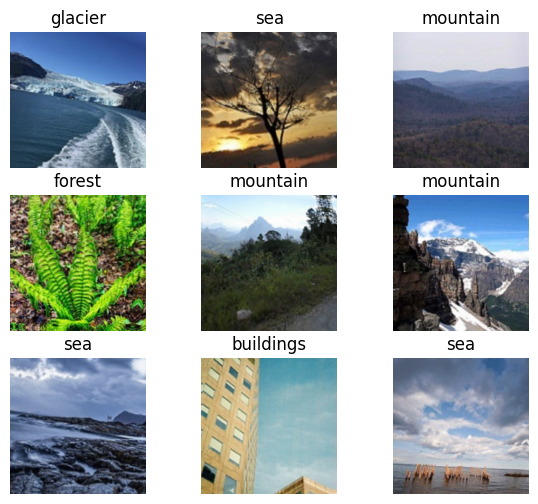

In [4]:
#Showing sample batches of the data.
data.show_batch(nrows=3, ncols=3, figsize=(7,6))

In [5]:
#Displaying the classes in the data, and the number of classes available.
print(data.vocab)
print(len(data.vocab))
print(data.c)


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
6
6


In [6]:
#Creating the model.
learn = cnn_learner(data, models.resnet18, metrics=[accuracy], model_dir = Path("E:\AI Mini Porject\working"),path = Path("."))
#----------------------------------------------------------------
# Update the above path and this is where the model will be saved
#----------------------------------------------------------------

c:\Users\Meheraab\AppData\Local\Programs\Python\Python311\Lib\site-packages\fastai\vision\learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


In [7]:
print(torch.cuda.is_available())

USE_CUDA = True

mod = torch.nn.Linear(20, 30)
if USE_CUDA:
    mod.cuda()

device = 'cpu'
if USE_CUDA:
    device = 'cuda'
inp = torch.randn(128, 20, device=device)
print(mod(inp).device)


True
cuda:0


SuggestedLRs(valley=0.0014454397605732083)

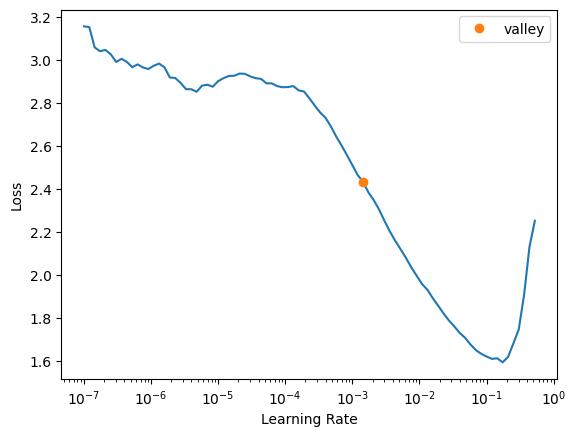

In [8]:
#Finding LR
learn.lr_find()


In [10]:
#Training the Model
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(40, lr_max=slice(lr1, lr2))



epoch,train_loss,valid_loss,accuracy,time
0,0.363263,1.382386,0.925873,01:07
1,0.273731,0.910452,0.919458,01:06
2,0.261051,1.111375,0.923022,01:06
3,0.290350,0.811171,0.904490,01:06
4,0.447838,4.707730,0.894155,01:05
5,0.475888,2.947545,0.888810,01:06
6,0.635811,11.098350,0.875980,01:06
7,0.720647,14.060280,0.862081,01:06
8,1.105953,1.022170,0.881326,01:07
9,0.744187,1.610122,0.914825,01:06


In [15]:
#Saving the model after the first training run
import pickle
pickle.dump(learn,open('E:\AI Mini Porject\Useful Models\model.pkl','wb'))

#--------------------------------------------------------------------
# Once again update this path with where you want to store your model
#--------------------------------------------------------------------

In [19]:
#Fitting the parameters
learn.unfreeze()
learn.fit_one_cycle(20,slice(1e-4,1e-3))


epoch,train_loss,valid_loss,accuracy,time
0,0.162474,5.555866,0.923022,01:17
1,0.180241,3.896611,0.918746,01:17
2,0.222389,1.188406,0.917320,01:18
3,0.229081,4.120953,0.914825,01:18
4,0.218737,2.721943,0.898432,01:19
5,0.202646,0.281554,0.915895,01:18
6,0.179825,0.254922,0.926942,01:17
7,0.174716,0.220374,0.926586,01:19
8,0.146457,14.345304,0.919458,01:16
9,0.129596,1.533880,0.933001,01:16


In [21]:
import pickle
pickle.dump(learn,open('E:\AI Mini Porject\Useful Models\\final_model.pkl','wb'))

#--------------------------------------------------------------------
# Once again update this path with where you want to store your model
#--------------------------------------------------------------------

In [29]:
#Showing the model in action
img = load_image("E:\AI Mini Porject\intel_image_classification_datatset\seg_pred\seg_pred\\52.jpg")
print(learn.predict(img)[0])

#-----------------------------------------------------------------------------------------------------------------------------------
# Set the above paths to the location of the %parent_directory%\intel_image_classification_datatset\seg_pred\seg_pred\%sample_image%
#-----------------------------------------------------------------------------------------------------------------------------------

mountain


In [31]:
img = load_image("E:\AI Mini Porject\intel_image_classification_datatset\seg_pred\seg_pred\\76.jpg")
print(learn.predict(img)[0])

#-----------------------------------------------------------------------------------------------------------------------------------
# Set the above paths to the location of the %parent_directory%\intel_image_classification_datatset\seg_pred\seg_pred\%sample_image%
#-----------------------------------------------------------------------------------------------------------------------------------

mountain


In [2]:
import pickle
loaded_model=pickle.load(open('final_model.pkl','rb'))

#-------------------------------------
# Above is the path of the saved model
#-------------------------------------


In [4]:
img = load_image("E:\AI Mini Porject\intel_image_classification_datatset\seg_pred\seg_pred\\5.jpg")
print(loaded_model.predict(img)[0])

buildings


In [24]:
#------------------------------------
# Uneccessary Saving Models and Paths 
#------------------------------------

PATH = './classifier.pth'
torch.save(learn.state_dict(), PATH)

In [28]:
#------------------------------------
# Uneccessary Saving Models and Paths 
#------------------------------------

learn.export("E:\AI Mini Porject\working\export.pkl")
learn.model_dir = "E:\AI Mini Porject\working"
learn.save("stage-1")

Path('E:/AI Mini Porject/working/stage-1.pth')